In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model

In [2]:
df = pd.read_csv('export.csv', sep=';', names = ["v1", "v2", "time"])

In [3]:
df.head(10)

,v1,v2,time
0,95,35,5.543350
1,42,99,7.212388
2,32,12,3.062813
3,34,35,3.239781
4,52,65,4.985076
5,68,65,4.355802
6,97,84,10.635804
7,32,56,3.309602
8,16,37,17.303474
9,5,92,2.937968


In [7]:
for index, row in df.iterrows():
    if(row["v1"]<10 and row["v2"]<10): #Both have 1 digit
        df.loc[index, "complexity"] = 0
    elif(row["v1"]==0 or row["v2"]==0): #One of the values is 0
        df.loc[index, "complexity"] = 1
    elif(row["v1"]%10==0 and row["v2"]%10==0): #Both can be divided by 10
        df.loc[index, "complexity"] = 2
    elif(row["v1"]<10 or row["v2"]<10): #One of the values has 1 digit
        df.loc[index, "complexity"] = 3
    elif((row["v1"] + row["v2"])%10==0): #Sum divided by 10 is 0
        df.loc[index, "complexity"] = 4
    elif(row["v1"]%2==0 and row["v2"]%2==0): #Both are even
        df.loc[index, "complexity"] = 5
    elif(row["v1"]%2==0 and row["v2"]%2==1): #One of them is even
        df.loc[index, "complexity"] = 6
    elif(row["v1"]%2==1 and row["v2"]%2==0): #One of them is even
        df.loc[index, "complexity"] = 6
    elif(row["v1"]%2==1 and row["v2"]%2==1): #Both are odd
        df.loc[index, "complexity"] = 7

In [8]:
df['complexity'] = df['complexity'].astype(int)

In [9]:
df.head(20)

,v1,v2,time,complexity
0,95,35,5.543350,4
1,42,99,7.212388,6
2,32,12,3.062813,5
3,34,35,3.239781,6
4,52,65,4.985076,6
5,68,65,4.355802,6
6,97,84,10.635804,6
7,32,56,3.309602,5
8,16,37,17.303474,6
9,5,92,2.937968,3


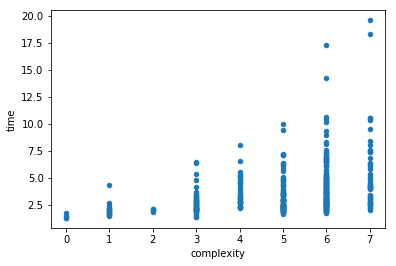

In [10]:
df.plot(x="complexity", y="time", kind="scatter")

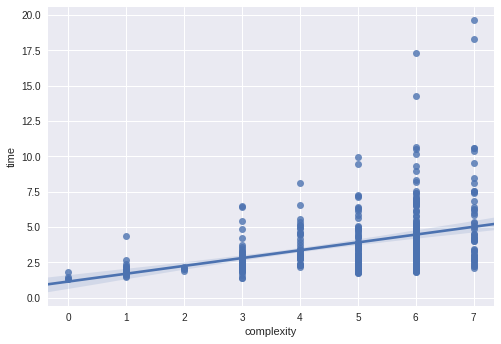

In [11]:
#Paint regression line
import seaborn as sns
sns.set(color_codes=True)
sns.regplot(x="complexity", y="time", data=df)

In [12]:
X = df["complexity"]
y = df["time"]
#Create test data
X_test = X[0:len(df)/2].values.reshape(-1,1)
y_test = y[0:len(df)/2]
#Create train data
X_train = X[len(df)/2:].values.reshape(-1,1)
y_train = y[len(df)/2:]

In [13]:
ols = linear_model.LinearRegression()

In [14]:
model = ols.fit(X_train, y_train)

In [15]:
model.coef_

array([ 0.45854648])

In [16]:
model.score(X_test, y_test)

0.068571367090081159

In [17]:
list(model.predict(X_test))

[3.2184829842759335,
 4.1355759437347395,
 3.6770294640053365,
 4.1355759437347395,
 4.1355759437347395,
 4.1355759437347395,
 4.1355759437347395,
 3.6770294640053365,
 4.1355759437347395,
 2.7599365045465301,
 3.6770294640053365,
 4.5941224234641425,
 4.1355759437347395,
 1.8428435450877234,
 3.6770294640053365,
 3.6770294640053365,
 4.1355759437347395,
 3.6770294640053365,
 3.6770294640053365,
 3.2184829842759335,
 4.5941224234641425,
 2.7599365045465301,
 3.6770294640053365,
 4.1355759437347395,
 4.1355759437347395,
 3.2184829842759335,
 4.1355759437347395,
 4.5941224234641425,
 3.6770294640053365,
 3.6770294640053365,
 3.6770294640053365,
 4.1355759437347395,
 3.6770294640053365,
 4.5941224234641425,
 2.7599365045465301,
 4.1355759437347395,
 3.2184829842759335,
 3.2184829842759335,
 4.5941224234641425,
 3.6770294640053365,
 3.6770294640053365,
 4.1355759437347395,
 3.6770294640053365,
 4.5941224234641425,
 3.2184829842759335,
 4.5941224234641425,
 4.5941224234641425,
 4.1355759437

In [18]:
import cPickle
#Save classifier
with open("classifier.pkl", "wb") as fid:
    cPickle.dump(model, fid)

In [19]:
with open("classifier.pkl", "rb") as fid:
    regr_loaded = cPickle.load(fid)